# Feedforward Neural Network implementation

Frist I have loaded locally the preprocessed dataset so that it is ready for implementation

In [3]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


Installing shap to help us with visualization which will be needed

In [4]:
# Required Libraries
!pip install imbalanced-learn --quiet
!pip install shap --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping



Applying smote and balancing the dataset. We applied Smote to the training data to balance the class distribution by generating synthetic samples for the minority class.

In [5]:
df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)



Now we start with the different hyperparameters and other factors on the feed forward Neural Network which we will adjust and test to optimize the model's performance

Test #1

This will be our base model and we will see any changes to make along the way, comparing them to this. This model has 2 hidden layers and 50 epochs

In [7]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6370 - loss: 0.6326 - val_accuracy: 0.5081 - val_loss: 0.7944
Epoch 2/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6642 - loss: 0.5845 - val_accuracy: 0.5130 - val_loss: 0.7881
Epoch 3/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6728 - loss: 0.5762 - val_accuracy: 0.5417 - val_loss: 0.7967
Epoch 4/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6787 - loss: 0.5715 - val_accuracy: 0.5157 - val_loss: 0.7974
Epoch 5/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6771 - loss: 0.5711 - val_accuracy: 0.5135 - val_loss: 0.8006
Epoch 6/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6810 - loss: 0.5683 - val_accuracy: 0.5233 - val_loss: 0.7863
Epoch 7/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6829 - loss: 0.5673 - val_accuracy: 0.4519 - val_loss: 0.7886
Epoch 8/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6852 - loss: 0.563

691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[14377  3265]
 [ 2718  1746]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83     17642
           1       0.35      0.39      0.37      4464

    accuracy                           0.73     22106
   macro avg       0.59      0.60      0.60     22106
weighted avg       0.74      0.73      0.74     22106

Accuracy on Test Set: 0.7293


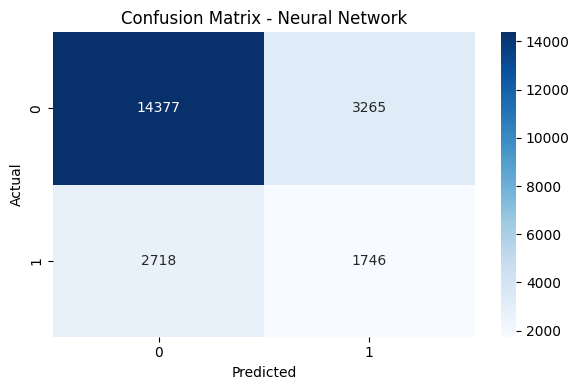

In [8]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


Test 2


Deep neural network with 10 hidden layers (all with ReLU activation), followed by dropout layers to prevent overfitting

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(Dropout(0.3))

for _ in range(9):
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6206 - loss: 0.6397 - val_accuracy: 0.0000e+00 - val_loss: 0.7438
Epoch 2/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6295 - loss: 0.5975 - val_accuracy: 0.8037 - val_loss: 0.7124
Epoch 3/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6492 - loss: 0.5921 - val_accuracy: 0.7993 - val_loss: 0.7295
Epoch 4/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6536 - loss: 0.5871 - val_accuracy: 0.7319 - val_loss: 0.7027
Epoch 5/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6623 - loss: 0.5834 - val_accuracy: 0.7435 - val_loss: 0.7022
Epoch 6/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6597 - loss: 0.5826 - val_accuracy: 0.7480 - val_loss: 0.6871
Epoch 7/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6624 - loss: 0.5842 - val_accuracy: 0.7525 - val_loss: 0.6906
Epoch 8/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6659 - loss

691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[10828  6814]
 [ 1298  3166]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.73     17642
           1       0.32      0.71      0.44      4464

    accuracy                           0.63     22106
   macro avg       0.61      0.66      0.58     22106
weighted avg       0.78      0.63      0.67     22106

Accuracy on Test Set: 0.6330


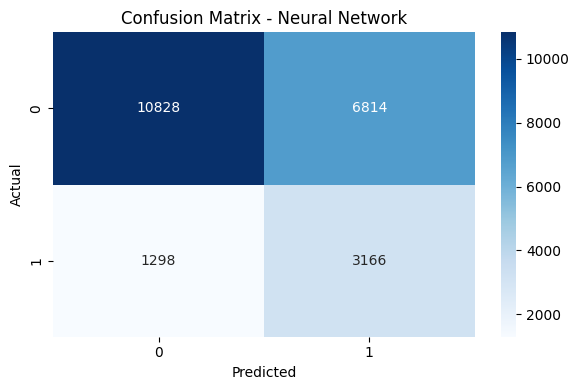

In [10]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Test 3

Using Different Units per Hidden Layer

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Confusion Matrix:
[[17062   580]
 [ 4248   216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     17642
           1       0.27      0.05      0.08      4464

    accuracy                           0.78     22106
   macro avg       0.54      0.51      0.48     22106
weighted avg       0.69      0.78      0.72     22106

Accuracy on Test Set: 0.7816


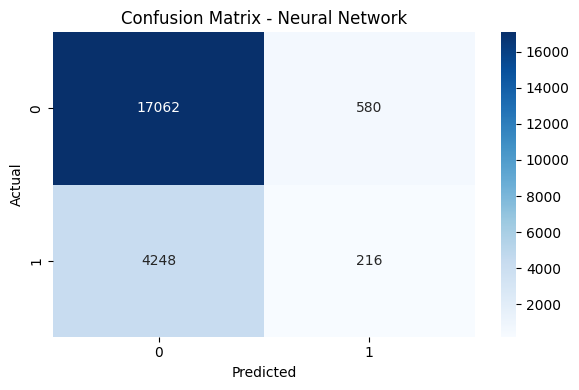

In [12]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Test 4

Changed Dropout Rate (to 0.5 instead of 0.3)

In [13]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(Dropout(0.5))

for _ in range(9):
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[ 1111 16531]
 [  249  4215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.06      0.12     17642
           1       0.20      0.94      0.33      4464

    accuracy                           0.24     22106
   macro avg       0.51      0.50      0.23     22106
weighted avg       0.69      0.24      0.16     22106

Accuracy on Test Set: 0.2409


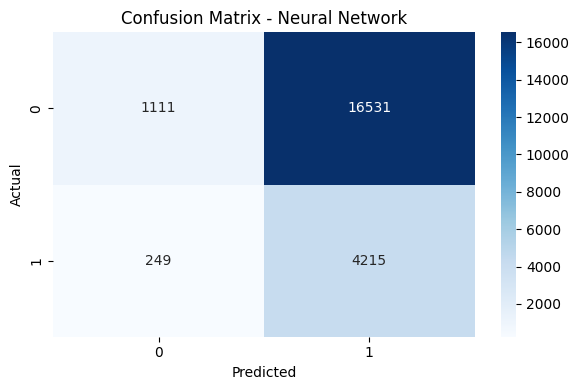

In [14]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Test 5

Added Batch Normalization Layers

In [15]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

for _ in range(9):
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[  574 17068]
 [   90  4374]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.03      0.06     17642
           1       0.20      0.98      0.34      4464

    accuracy                           0.22     22106
   macro avg       0.53      0.51      0.20     22106
weighted avg       0.73      0.22      0.12     22106

Accuracy on Test Set: 0.2238


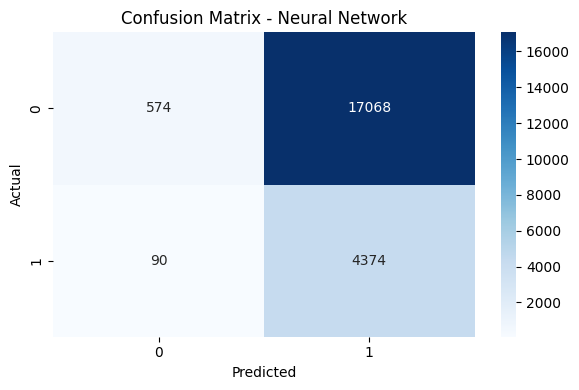

In [16]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Test 6

Deep neural network with 50 hidden layers (all with ReLU activation), followed by dropout layers to prevent overfitting

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(Dropout(0.3))

for _ in range(49):
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 61s 17ms/step - accuracy: 0.6247 - loss: 0.6639 - val_accuracy: 0.0000e+00 - val_loss: 0.9836
Epoch 2/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6240 - loss: 0.6625 - val_accuracy: 0.0000e+00 - val_loss: 0.9866
Epoch 3/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.6240 - loss: 0.6625 - val_accuracy: 0.0000e+00 - val_loss: 0.9874
Epoch 4/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.6244 - loss: 0.6622 - val_accuracy: 0.0000e+00 - val_loss: 0.9907
Epoch 5/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.6246 - loss: 0.6621 - val_accuracy: 0.0000e+00 - val_loss: 0.9872
Epoch 6/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.6252 - loss: 0.6617 - val_accuracy: 0.0000e+00 - val_loss: 0.9701
Epoch 7/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.6239 - loss: 0.6623 - val_accuracy: 0.0000e+00 - val_loss: 0.9922
Epoch 8/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 36s 21

691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[17642     0]
 [ 4464     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Accuracy on Test Set: 0.7981


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


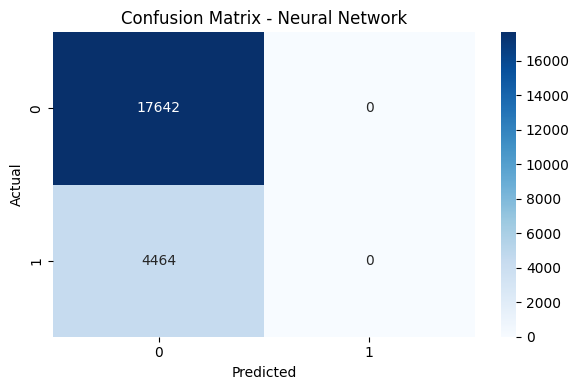

In [18]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Test 7

Deep neural network with 30 hidden layers (all with ReLU activation), followed by dropout layers to prevent overfitting

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(Dropout(0.3))

for _ in range(29):
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.6254 - loss: 0.6523 - val_accuracy: 0.0000e+00 - val_loss: 0.7914
Epoch 2/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6269 - loss: 0.6036 - val_accuracy: 0.8870 - val_loss: 0.7576
Epoch 3/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.6209 - loss: 0.6009 - val_accuracy: 0.0000e+00 - val_loss: 0.7991
Epoch 4/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6271 - loss: 0.5936 - val_accuracy: 0.0000e+00 - val_loss: 0.7890
Epoch 5/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6204 - loss: 0.5957 - val_accuracy: 0.0000e+00 - val_loss: 0.8274
Epoch 6/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6243 - loss: 0.5921 - val_accuracy: 0.0000e+00 - val_loss: 0.8521
Epoch 7/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6234 - loss: 0.5967 - val_accuracy: 0.0000e+00 - val_loss: 0.8335


691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[8017 9625]
 [ 568 3896]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.45      0.61     17642
           1       0.29      0.87      0.43      4464

    accuracy                           0.54     22106
   macro avg       0.61      0.66      0.52     22106
weighted avg       0.80      0.54      0.58     22106

Accuracy on Test Set: 0.5389


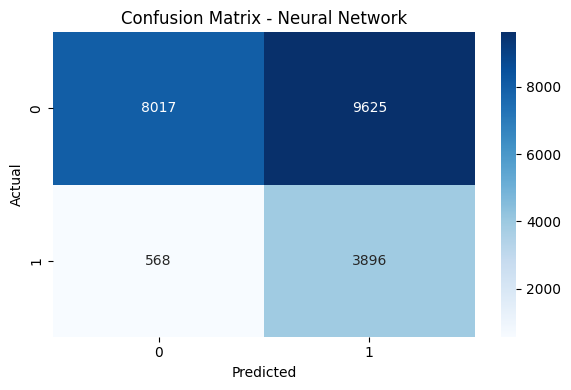

In [20]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Test 8

Deep neural network with 15 hidden layers (all with ReLU activation), followed by dropout layers to prevent overfitting

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(Dropout(0.3))

for _ in range(14):
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6210 - loss: 0.6423 - val_accuracy: 0.8718 - val_loss: 0.6987
Epoch 2/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6282 - loss: 0.5997 - val_accuracy: 0.8596 - val_loss: 0.7374
Epoch 3/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6286 - loss: 0.5944 - val_accuracy: 0.8737 - val_loss: 0.7245
Epoch 4/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6453 - loss: 0.5912 - val_accuracy: 0.9064 - val_loss: 0.6547
Epoch 5/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6471 - loss: 0.5856 - val_accuracy: 0.7656 - val_loss: 0.6860
Epoch 6/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6472 - loss: 0.5867 - val_accuracy: 0.7900 - val_loss: 0.7007
Epoch 7/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6468 - loss: 0.5879 - val_accuracy: 0.8158 - val_loss: 0.6798
Epoch 8/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6495 - loss: 0

691/691 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[7773 9869]
 [ 460 4004]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.44      0.60     17642
           1       0.29      0.90      0.44      4464

    accuracy                           0.53     22106
   macro avg       0.62      0.67      0.52     22106
weighted avg       0.81      0.53      0.57     22106

Accuracy on Test Set: 0.5328


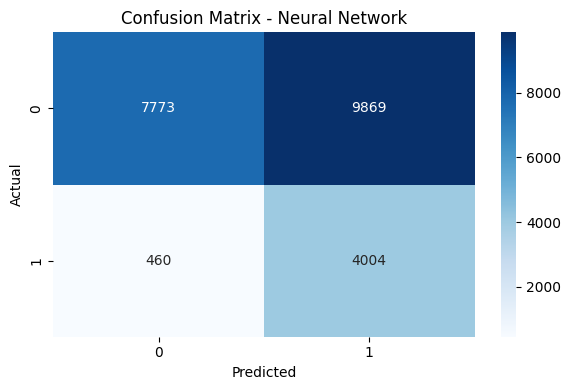

In [22]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

Test 9

Deep neural network with 40 hidden layers (all with ReLU activation), followed by dropout layers to prevent overfitting

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train_bal.shape[1],)))
model.add(Dropout(0.3))

for _ in range(39):
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.6251 - loss: 0.6642 - val_accuracy: 0.0000e+00 - val_loss: 1.0080
Epoch 2/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.6239 - loss: 0.6625 - val_accuracy: 0.0000e+00 - val_loss: 1.0178
Epoch 3/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6244 - loss: 0.6623 - val_accuracy: 0.0000e+00 - val_loss: 0.9793
Epoch 4/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6239 - loss: 0.6625 - val_accuracy: 0.0000e+00 - val_loss: 0.9904
Epoch 5/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6253 - loss: 0.6618 - val_accuracy: 0.0000e+00 - val_loss: 1.0299
Epoch 6/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6252 - loss: 0.6618 - val_accuracy: 0.0000e+00 - val_loss: 0.9810
Epoch 7/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.6235 - loss: 0.6625 - val_accuracy: 0.0000e+00 - val_loss: 0.9702
Epoch 8/50
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 24s 14

691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[  566 17076]
 [   24  4440]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.03      0.06     17642
           1       0.21      0.99      0.34      4464

    accuracy                           0.23     22106
   macro avg       0.58      0.51      0.20     22106
weighted avg       0.81      0.23      0.12     22106

Accuracy on Test Set: 0.2265


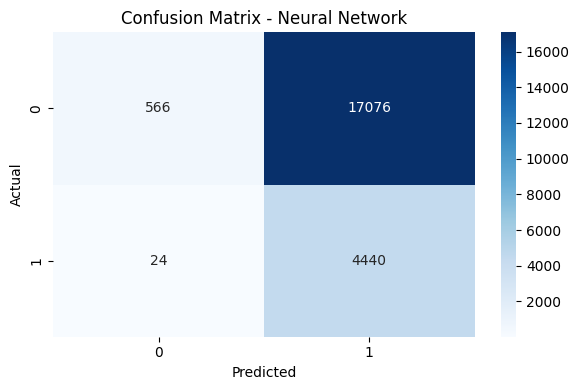

In [24]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()